<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex3_seaborn_timeseries_subplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import DataFrame
from pandas import Grouper
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data
unemp_data = data.unemployment_across_industries()
un=unemp_data
#un.head()

In [0]:
g = un.groupby('series')
g.groups.keys()
list(g.groups)

['Agriculture',
 'Business services',
 'Construction',
 'Education and Health',
 'Finance',
 'Government',
 'Information',
 'Leisure and hospitality',
 'Manufacturing',
 'Mining and Extraction',
 'Other',
 'Self-employed',
 'Transportation and Utilities',
 'Wholesale and Retail Trade']

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html


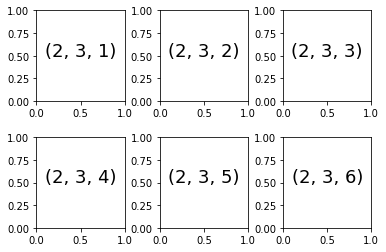

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

In [0]:

g1=g.get_group('Government') 
g2=g.get_group('Agriculture') 
g3=g.get_group('Construction') 
g4=g.get_group('Finance') 

fig, axes = plt.subplots(nrows=4, ncols=1)

#sns.lineplot(data=g1, x='year', y='rate',ax=axes[0])
#sns.lineplot(data=g2, x='year', y='rate',ax=axes[1])
#sns.lineplot(data=g3, x='year', y='rate',ax=axes[2])
#sns.lineplot(data=g4, x='year', y='rate',ax=axes[3])

sns.lineplot(data=g1, x='year', y='rate',ax=axes[0], legend)

sns.lineplot(data=g2, x='year', y='rate',ax=axes[1])
sns.lineplot(data=g3, x='year', y='rate',ax=axes[2])
sns.lineplot(data=g4, x='year', y='rate',ax=axes[3])


#g1.plot(ax=axes[0,0])
#g2.plot(ax=axes[0,1])

SyntaxError: ignored

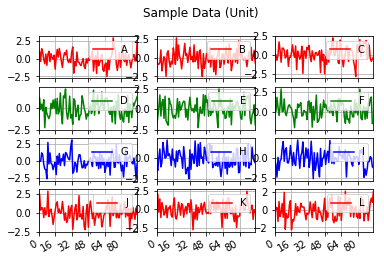

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
df = pd.DataFrame(np.random.randn(96,12),
                  columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                           'K', 'L'])

# Plotting
df.plot(kind='line', subplots=True, grid=True, title="Sample Data (Unit)",
    layout=(4, 3), sharex=True, sharey=False, legend=False,    
    style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
    xticks=np.arange(0, len(df), 16))

[ax.legend(loc=1) for ax in plt.gcf().axes]

In [0]:

# Plotting
g1.plot(kind='line', subplots=True, grid=True, title="Sample Data (Unit)",
        layout=(2, 3), sharex=True, sharey=False, legend=True,    
        style=['r',  'g',  'b', 'r','c'],) #,        xticks=np.arange(0, len(g1), 50))

[ax.legend(loc=1) for ax in plt.gcf().axes]

NameError: ignored

http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/

Text(0.5, 1.0, 'rate')

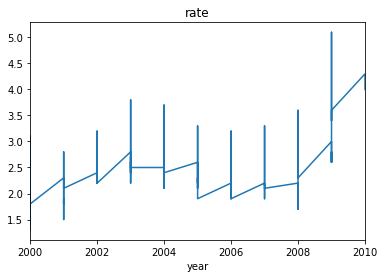

In [0]:
# Have one subplot
fig, ax = plt.subplots()
un[un['series'] == 'Government'].plot(x='year', y='rate', ax=ax, legend=False)
#un[un['series'] == 'Finance'].plot(x='year', y='rate', ax=ax, legend=False)
ax.set_title("rate")

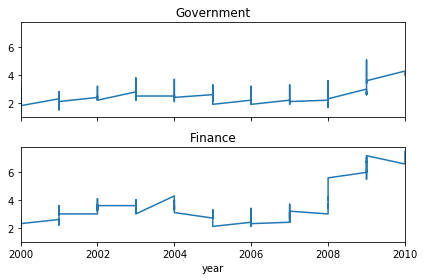

In [0]:
# Receive ax1 and ax2 - note that they go in parens
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# Use ax1 to plot Bhutan
#df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax1)
un[un['series'] == 'Government'].plot(x='year', y='rate', ax=ax1, legend=False)
ax1.set_title("Government")

# Use ax2 to plot Iran
#df[df['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax2)
un[un['series'] == 'Finance'].plot(x='year', y='rate', ax=ax2, legend=False)
ax2.set_title("Finance")
plt.tight_layout()



Text(0.5, 1.0, 'Finance')

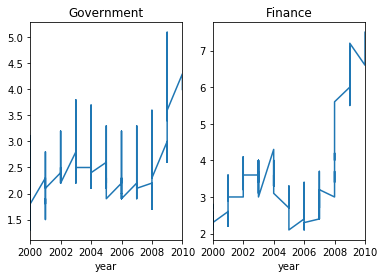

In [0]:
ax1 = plt.subplot(1, 2, 1)
un[un['series'] == 'Government'].plot(x='year', y='rate', ax=ax1, legend=False)
ax1.set_title("Government")

# 1 row, 2 columns, and we'd like the first element.
ax2 = plt.subplot(1, 2, 2)
un[un['series'] == 'Finance'].plot(x='year', y='rate', ax=ax2, legend=False)
ax2.set_title("Finance")

In [0]:
len(un.groupby('series'))

14

So we need 14 different graphs.

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


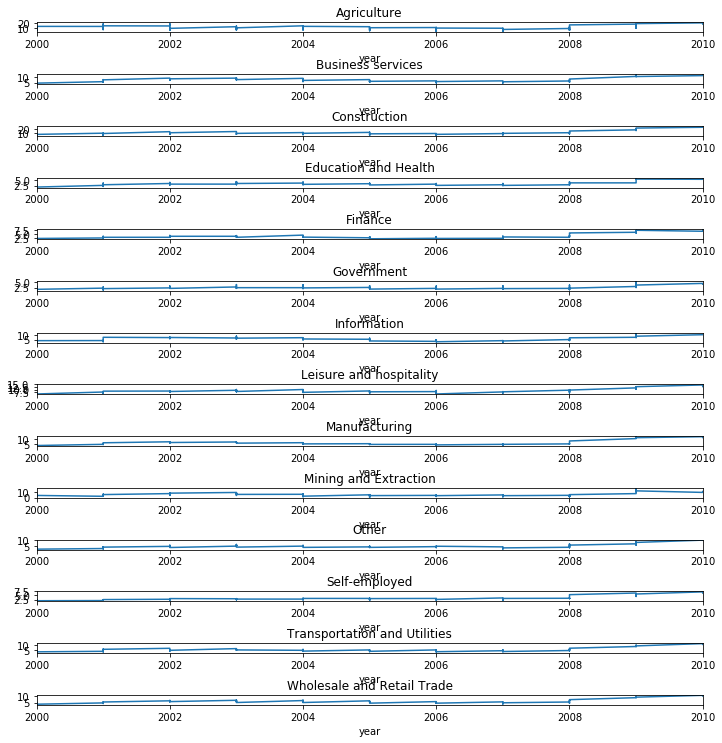

In [0]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(10,10), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1
for seriesname, selection in un.groupby('series'):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(14, 1, plot_number)
    selection.plot(x='year', y='rate', ax=ax, label=seriesname, legend=False)
    ax.set_title(seriesname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
    plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


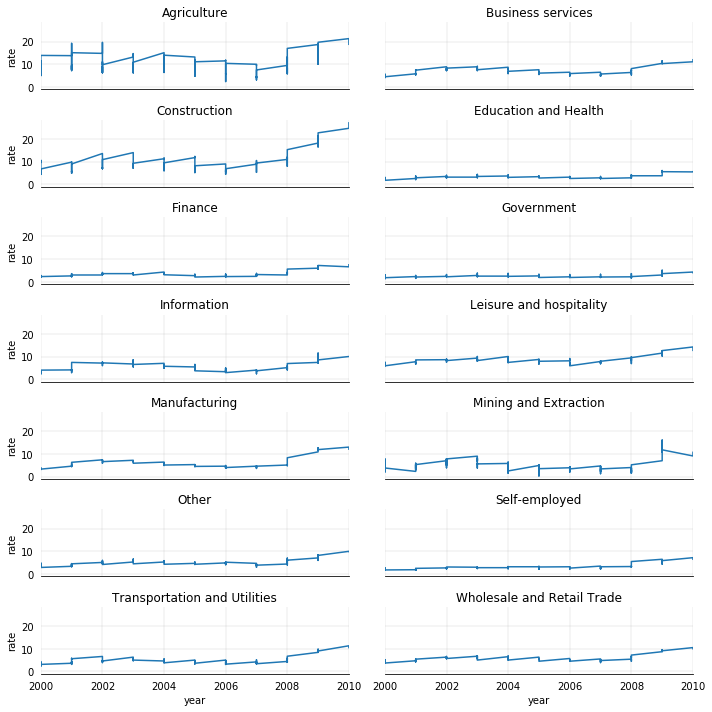

In [0]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True, sharey=True, figsize=(10,10), squeeze=True)  #nrows=14, ncols=1 didnt work, why?
axes_list = [item for sublist in axes for item in sublist] 
len(axes_list)

for seriesname, selection in un.groupby('series'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='rate', label=seriesname, ax=ax, legend=False)
    ax.set_title(seriesname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    #ax.set_ylim((0, 15000))
    #ax.set_xlim((1950, 2020))
    ax.set_ylabel("rate")
    #ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

Ordered by unemployment rate

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


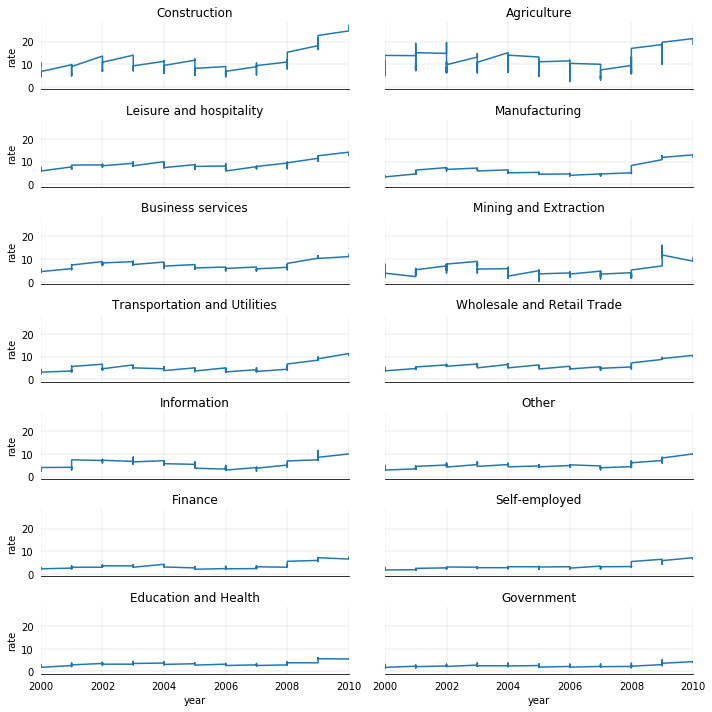

In [0]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True, sharey=True, figsize=(10,10), squeeze=True)  #nrows=14, ncols=1 didnt work, why?
axes_list = [item for sublist in axes for item in sublist] 


# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = un.groupby('series')
ordered_series = grouped['rate'].last().sort_values(ascending=False).index

first_year = un['year'].min()
last_year = un['year'].max()

for seriesname in ordered_series:
    selection = grouped.get_group(seriesname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='rate', label=seriesname, ax=ax, legend=False)
    ax.set_title(seriesname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
  # ax.set_xlim((1950, 2016))
    ax.set_xlabel("year")
    ax.set_ylabel("rate")
  # ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

  #  min_rate = selection['rate'].min()
  #  year_value = selection[un['rate'] == min_rate]['year']
  #  rv=pd.to_numeric(year_value.head(1), errors='coerce')
  #  ax.scatter(x=[rv], y=[min_rate], s=70, clip_on=False, linewidth=0)
  # ax.annotate(str(int(rate_value )) + "k", xy=[max_year, rate_value], xytext=[7, -2], textcoords='offset points')

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()
#plt.subplots_adjust(hspace=1)

In [0]:
    min_rate = selection['rate'].min()
    year_value = selection[un['rate'] == min_rate]['year']
    rv=pd.to_numeric(year_value.head(1), errors='coerce')
    year_value.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


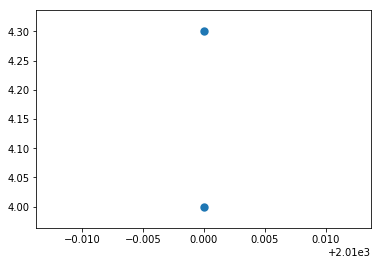

In [0]:
#first_year = un['year'].min()
#last_year = un['year'].max()
#first_year

max_year = selection['year'].max()
rate_value = selection[un['year'] == max_year]['rate']
rate_value
year_value = selection[un['year'] == max_year]['year']
year_value.shape
#rate_valuem = rate_value.first
#https://stackoverflow.com/questions/35967907/how-to-make-a-new-numpy-array-same-size-as-a-given-array-and-fill-it-with-a-scal
lenn= len(year_value)
if lenn > 1:
  A = np.full_like(rate_value, 1)
  for i in range(0, lenn):
        A[i] = max_year
A
B=rate_value.to_numpy() #need to convert dataframe to numpy array https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html
#plt.scatter(x=A, y=B, s=70, clip_on=False, linewidth=0)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


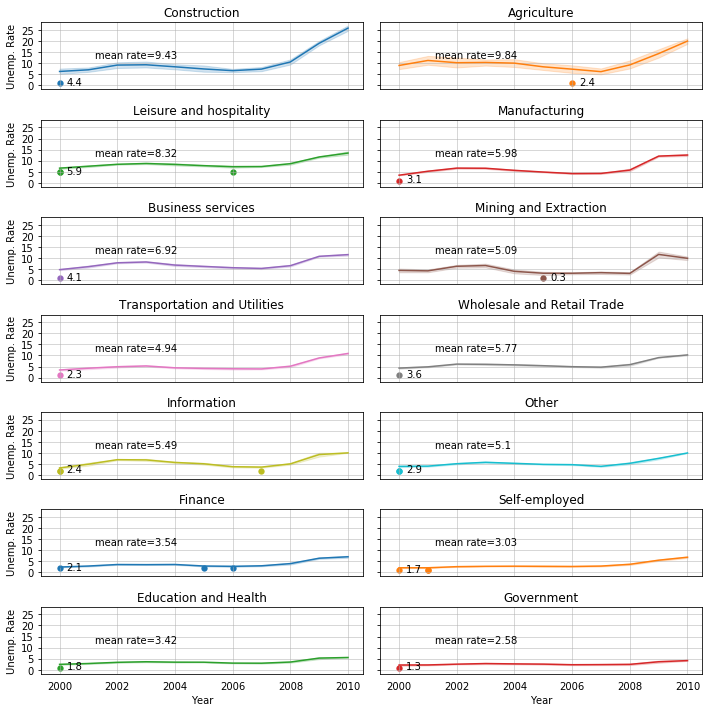

In [0]:
import itertools

# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True, sharey=True, figsize=(10,10), squeeze=True)  #nrows=14, ncols=1 didnt work, why?
axes_list = [item for sublist in axes for item in sublist] 

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = un.groupby('series')
ordered_series = grouped['rate'].last().sort_values(ascending=False).index

# set palette 
palette = itertools.cycle(sns.color_palette())

first_year = un['year'].min()
last_year = un['year'].max()

#palette = sns.color_palette(palette=sns.crayon_palette(sns.colors.crayons))
#palette = sns.color_palette("Set1", n_colors=14) #, desat=.5)

for seriesname in ordered_series:
    selection = grouped.get_group(seriesname)
    
  # color
    c = next(palette)
    ax = axes_list.pop(0)
  # selection.plot(x='year', y='rate', label=seriesname, ax=ax, legend=False)
    sns.lineplot(data=selection, x='year', y='rate', ax=ax, color=c) #palette[i]) # color='r') #
    ax.set_title(seriesname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='on',
        right='off',
        top='off'
    )

    ax.grid(linewidth=0.5)
  # ax.set_xlim((1950, 2016))
    ax.set_xlabel("Year")
    ax.set_ylabel("Unemp. Rate")
    ax.set_yticks(range(0, 30, 5))
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    min_rate = selection['rate'].min()
    year_value = selection[un['rate'] == min_rate]['year']
  # rate_value = selection[un['rate'] == min_rate]['rate']
    A = year_value.to_numpy() 
    B = np.full_like(year_value, 1)
    lenn = len(year_value)
    if lenn > 1:
      for i in range(0, lenn):
        B[i] = min_rate 
    ax.scatter(x=A, y=B, s=40, clip_on=True, linewidth=0, color=c)
    ax.annotate(str(round(min_rate,2)) , xy=[A[0], B[0]], xytext=[7, -2], textcoords='offset points')

    mean_rate = selection['rate'].mean()
    ax.annotate("mean rate=" + str(round(mean_rate,2)), xy=[2001, 13], xytext=[7, -2], textcoords='offset points')
 
 # Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()
#plt.subplots_adjust(hspace=1) # makes it more crowded